In [2]:
import pandas as pd
import time
import re 
import seaborn as sns
import numpy as np
import ast
import matplotlib.pyplot as plt

song_files = ['2019-3-1','2019-3-15','2019-4-1','2019-4-15','2019-5-1']

In [3]:
song_info = pd.read_csv('../data/lyrics/song_info.txt')
song_info = song_info[song_info['lang'] == 'en']
song_info = song_info[['song_id', 'title', 'artist', 'lyrics', 'audio_features']]
song_info.drop_duplicates(subset='song_id', inplace=True)
song_info.head()

vader_scores = pd.read_csv('../data/vader_scores.txt')
song_info = song_info.merge(right=vader_scores, on='song_id', how='inner')

In [4]:
song_info['musical_valence'] = song_info.audio_features.map(lambda x: ast.literal_eval(x)['valence'])

Text(0.5, 0, 'VADER Score')

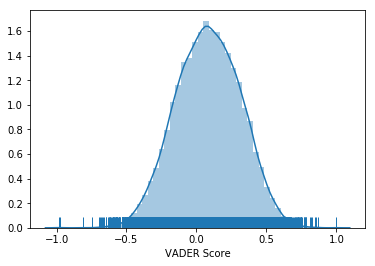

In [6]:
ax = sns.distplot(song_info['vader_score'], rug=True)
ax.set_xlabel('VADER Score')
# plt.savefig('../report/report_graphics/vader.png', dpi=1000)

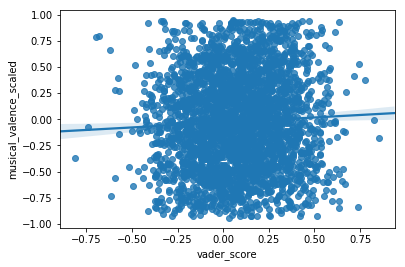

In [62]:
sns.regplot(data=song_info.sample(3000), x='vader_score', y='musical_valence_scaled')

In [107]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(song_info['vader_score'], song_info['musical_valence_scaled'])
print(corr, p_value)

0.05524182146148096 1.3190007799779671e-13


### Top 5 Positive/Negative VADER scores by Country

In [18]:
songs_file = '../data/songs/songs_2019-5-1.txt'
songs = pd.read_csv(songs_file)

vader_scores = pd.read_csv('../data/vader_scores.txt')
songs = songs.merge(right=vader_scores, on='song_id', how='inner')

In [43]:
songs['country'] = songs.location.str[-2:]

g = songs.groupby('country')
g = g.filter(lambda x: len(x) >= 20)

country_sent = g.groupby(['country'])['vader_score'].mean()
country_sent = country_sent.to_frame()
country_sent.reset_index(inplace=True)

In [44]:
country_sent.sort_values(by='vader_score',ascending=False)[:5]

,country,vader_score
25,KW,0.254273
17,ID,0.223280
37,SA,0.217972
35,QA,0.202125
0,AE,0.195555


In [45]:
country_sent.sort_values(by='vader_score')[:5]

,country,vader_score
21,IT,-0.094795
39,TW,0.017980
7,CL,0.042754
23,JM,0.047072
14,FR,0.061008


### VADER over time

In [77]:
country = 'US'
dates = []
scores = []

for songs_date in song_files:
    songs_file = '../data/songs/songs_'+songs_date+'.txt'
    songs = pd.read_csv(songs_file)
    songs['country'] = songs.location.str[-2:]
    songs = songs[songs['country'] == country]
    songs = songs.merge(right=vader_scores, how='inner', on='song_id')
    
    dates.append(songs_date)
    scores.append(songs['vader_score'].mean())

tups = list(zip(dates, scores))
df = pd.DataFrame(tups, columns=['date','vader_score'])
df.head()

Text(0.5, 0, 'Date')

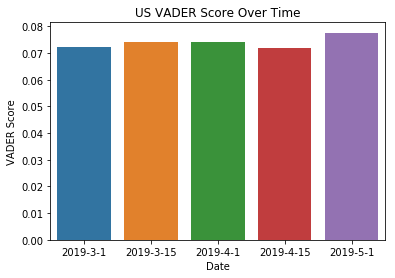

In [79]:
ax = sns.barplot(data=df, x='date', y='vader_score')
ax.set_title('US VADER Score Over Time')
ax.set_ylabel('VADER Score')
ax.set_xlabel('Date')

In [75]:
location = 'New York New York US'
dates = []
scores = []

for songs_date in song_files:
    songs_file = '../data/songs/songs_'+songs_date+'.txt'
    songs = pd.read_csv(songs_file)
    songs = songs[songs['location'] == location]
    songs = songs.merge(right=vader_scores, how='inner', on='song_id')
    
    dates.append(songs_date)
    scores.append(songs['vader_score'].mean())
    
tups = list(zip(dates, scores))
df = pd.DataFrame(tups, columns=['date','vader_score'])
df.head()

,date,vader_score
0,2019-3-1,0.076878
1,2019-3-15,0.162965
2,2019-4-1,0.077791
3,2019-4-15,0.085406
4,2019-5-1,0.085120


Text(0.5, 0, 'Date')

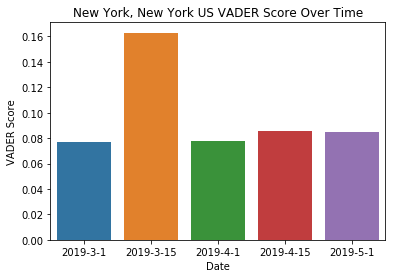

In [76]:
ax = sns.barplot(data=df, x='date', y='vader_score')
ax.set_title('New York, New York US VADER Score Over Time')
ax.set_ylabel('VADER Score')
ax.set_xlabel('Date')

In [82]:
country = 'FR'
dates = []
scores = []

for songs_date in song_files:
    songs_file = '../data/songs/songs_'+songs_date+'.txt'
    songs = pd.read_csv(songs_file)
    songs['country'] = songs.location.str[-2:]
    songs = songs[songs['country'] == country]
    songs = songs.merge(right=vader_scores, how='inner', on='song_id')
    
    dates.append(songs_date)
    scores.append(songs['vader_score'].mean())

tups = list(zip(dates, scores))
df = pd.DataFrame(tups, columns=['date','vader_score'])
df.head()

,date,vader_score
0,2019-3-1,0.118423
1,2019-3-15,0.119276
2,2019-4-1,0.088732
3,2019-4-15,0.067373
4,2019-5-1,0.061008


Text(0.5, 0, 'Date')

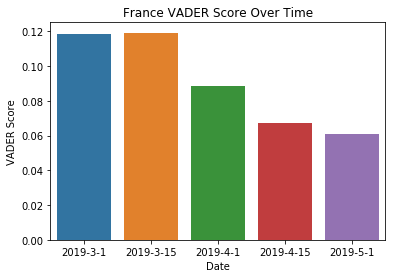

In [83]:
ax = sns.barplot(data=df, x='date', y='vader_score')
ax.set_title('France VADER Score Over Time')
ax.set_ylabel('VADER Score')
ax.set_xlabel('Date')

In [92]:
location = 'Paris FR'
dates = []
scores = []

for songs_date in song_files:
    songs_file = '../data/songs/songs_'+songs_date+'.txt'
    songs = pd.read_csv(songs_file)
    songs = songs[songs['location'] == location]
    songs = songs.merge(right=vader_scores, how='inner', on='song_id')
    
    dates.append(songs_date)
    scores.append(songs['vader_score'].mean())
    
tups = list(zip(dates, scores))
paris_df = pd.DataFrame(tups, columns=['date','vader_score'])

Text(0.5, 0, 'Date')

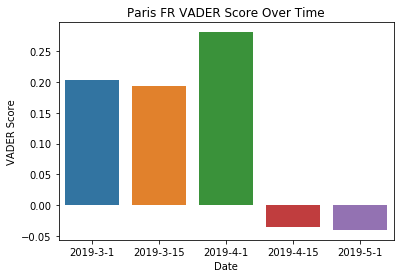

In [93]:
ax = sns.barplot(data=paris_df, x='date', y='vader_score')
ax.set_title('Paris FR VADER Score Over Time')
ax.set_ylabel('VADER Score')
ax.set_xlabel('Date')

Text(0.5, 0, 'Date')

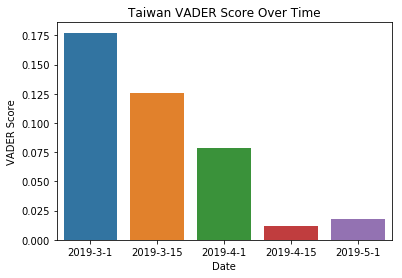

In [96]:
country = 'TW'
dates = []
scores = []

for songs_date in song_files:
    songs_file = '../data/songs/songs_'+songs_date+'.txt'
    songs = pd.read_csv(songs_file)
    songs['country'] = songs.location.str[-2:]
    songs = songs[songs['country'] == country]
    songs = songs.merge(right=vader_scores, how='inner', on='song_id')
    
    dates.append(songs_date)
    scores.append(songs['vader_score'].mean())

tups = list(zip(dates, scores))
df = pd.DataFrame(tups, columns=['date','vader_score'])

ax = sns.barplot(data=df, x='date', y='vader_score')
ax.set_title('Taiwan VADER Score Over Time')
ax.set_ylabel('VADER Score')
ax.set_xlabel('Date')

Text(0.5, 0, 'Date')

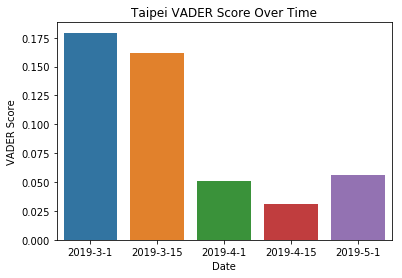

In [97]:
location = 'Taipei TW'
dates = []
scores = []

for songs_date in song_files:
    songs_file = '../data/songs/songs_'+songs_date+'.txt'
    songs = pd.read_csv(songs_file)
    songs = songs[songs['location'] == location]
    songs = songs.merge(right=vader_scores, how='inner', on='song_id')
    
    dates.append(songs_date)
    scores.append(songs['vader_score'].mean())
    
tups = list(zip(dates, scores))
df = pd.DataFrame(tups, columns=['date','vader_score'])

ax = sns.barplot(data=df, x='date', y='vader_score')
ax.set_title('Taipei VADER Score Over Time')
ax.set_ylabel('VADER Score')
ax.set_xlabel('Date')